In [1]:
import pandas as pd
apple = pd.read_csv("AAPL.csv")
print(apple.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2014-09-29  100.589996  100.690002   98.040001   99.620003   93.514290   
1  2014-10-06   99.949997  102.379997   98.309998  100.730003   94.556244   
2  2014-10-13  101.330002  101.779999   95.180000   97.669998   91.683792   
3  2014-10-20   98.320000  105.489998   98.220001  105.220001   98.771042   
4  2014-10-27  104.849998  108.040001  104.699997  108.000000  101.380676   

      Volume  
0  142718700  
1  280258200  
2  358539800  
3  358532900  
4  220230600  


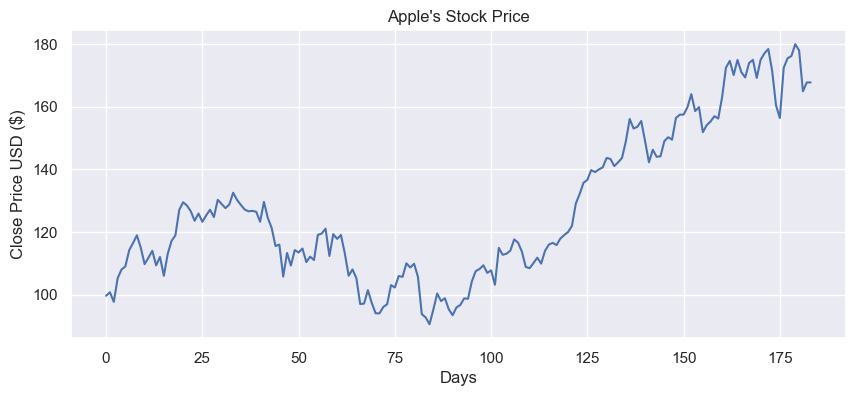

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(10, 4))
plt.title("Apple's Stock Price")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple["Close"])
plt.show()

In [5]:
apple.shape

(184, 7)

In [6]:
apple = apple[["Close"]]
print(apple.head())

        Close
0   99.620003
1  100.730003
2   97.669998
3  105.220001
4  108.000000


In [7]:
futureDays = 25

In [9]:
apple["Prediction"] = apple[["Close"]].shift(-futureDays)
print(apple.head())
print(apple.tail())

        Close  Prediction
0   99.620003  123.250000
1  100.730003  125.320000
2   97.669998  127.099998
3  105.220001  124.750000
4  108.000000  130.279999
          Close  Prediction
179  179.979996         NaN
180  178.020004         NaN
181  164.940002         NaN
182  167.779999         NaN
183  167.779999         NaN


C:\Users\antuk\AppData\Local\Temp\ipykernel_32332\4162881674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple["Prediction"] = apple[["Close"]].shift(-futureDays)


In [12]:
import numpy as np
x = np.array(apple.drop(columns=["Prediction"]))[:-futureDays]
print(x)

[[ 99.620003]
 [100.730003]
 [ 97.669998]
 [105.220001]
 [108.      ]
 [109.010002]
 [114.18    ]
 [116.470001]
 [118.93    ]
 [115.      ]
 [109.730003]
 [111.779999]
 [113.989998]
 [109.330002]
 [112.010002]
 [105.989998]
 [112.980003]
 [117.160004]
 [118.93    ]
 [127.080002]
 [129.5     ]
 [128.460007]
 [126.599998]
 [123.589996]
 [125.900002]
 [123.25    ]
 [125.32    ]
 [127.099998]
 [124.75    ]
 [130.279999]
 [128.949997]
 [127.620003]
 [128.770004]
 [132.539993]
 [130.279999]
 [128.649994]
 [127.169998]
 [126.599998]
 [126.75    ]
 [126.440002]
 [123.279999]
 [129.619995]
 [124.5     ]
 [121.300003]
 [115.519997]
 [115.959999]
 [105.760002]
 [113.290001]
 [109.269997]
 [114.209999]
 [113.449997]
 [114.709999]
 [110.379997]
 [112.120003]
 [111.040001]
 [119.080002]
 [119.5     ]
 [121.059998]
 [112.339996]
 [119.300003]
 [117.809998]
 [119.029999]
 [113.18    ]
 [106.029999]
 [108.029999]
 [105.260002]
 [ 96.959999]
 [ 97.129997]
 [101.419998]
 [ 97.339996]
 [ 94.019997]
 [ 93.

In [13]:
y = np.array(apple["Prediction"])[:-futureDays]
print(y)

[123.25     125.32     127.099998 124.75     130.279999 128.949997
 127.620003 128.770004 132.539993 130.279999 128.649994 127.169998
 126.599998 126.75     126.440002 123.279999 129.619995 124.5
 121.300003 115.519997 115.959999 105.760002 113.290001 109.269997
 114.209999 113.449997 114.709999 110.379997 112.120003 111.040001
 119.080002 119.5      121.059998 112.339996 119.300003 117.809998
 119.029999 113.18     106.029999 108.029999 105.260002  96.959999
  97.129997 101.419998  97.339996  94.019997  93.989998  96.040001
  96.910004 103.010002 102.260002 105.919998 105.669998 109.989998
 108.660004 109.849998 105.68      93.739998  92.720001  90.519997
  95.220001 100.349998  97.919998  98.830002  95.330002  93.400002
  95.889999  96.68      98.779999  98.660004 104.209999 107.480003
 108.18     109.360001 106.940002 107.730003 103.129997 114.919998
 112.709999 113.050003 114.059998 117.629997 116.599998 113.720001
 108.839996 108.43     110.059998 111.790001 109.900002 113.949997


In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)

In [15]:
# Creating the decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(xtrain, ytrain)

# creating the Linear Regression model
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(xtrain, ytrain)

In [17]:
xfuture = apple.drop(columns=["Prediction"])[:-futureDays]
xfuture = xfuture.tail(futureDays)
xfuture = np.array(xfuture)
print(xfuture)

[[143.649994]
 [148.960007]
 [156.100006]
 [153.059998]
 [153.610001]
 [155.449997]
 [148.979996]
 [142.270004]
 [146.279999]
 [144.020004]
 [144.179993]
 [149.039993]
 [150.270004]
 [149.5     ]
 [156.389999]
 [157.479996]
 [157.5     ]
 [159.860001]
 [164.050003]
 [158.630005]
 [159.880005]
 [151.889999]
 [154.119995]
 [155.300003]
 [156.990005]]


In [18]:
treePrediction = tree.predict(xfuture)
print("Decision Tree prediction =",treePrediction)

Decision Tree prediction = [156.25     163.050003 172.5      174.669998 170.149994 167.779999
 171.050003 163.18     173.970001 175.009995 169.229996 175.
 177.089996 178.460007 171.509995 160.5      156.410004 172.429993
 175.5      156.410004 172.429993 178.020004 164.940002 167.779999
 160.5     ]


In [19]:
linearPrediction = linear.predict(xfuture)
print("Linear regression Prediction =",linearPrediction)

Linear regression Prediction = [151.6880922  157.00808212 164.16149638 161.11577654 161.66681294
 163.51026609 157.02810868 150.30550935 154.32303868 152.0587974
 152.21908701 157.0882184  158.32054046 157.54908971 164.45203425
 165.54407923 165.56412081 167.92855599 172.12643054 166.69624897
 167.94859758 159.94357925 162.17776516 163.35999026 165.05316759]


C:\Users\antuk\AppData\Local\Temp\ipykernel_32332\2779394554.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


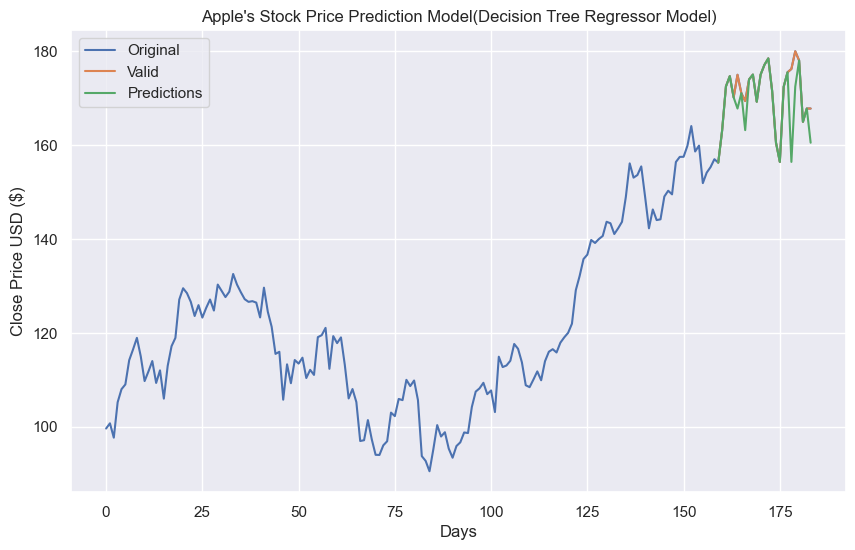

In [27]:
predictions = treePrediction
valid = apple[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))
plt.title("Apple's Stock Price Prediction Model(Decision Tree Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

C:\Users\antuk\AppData\Local\Temp\ipykernel_32332\93325786.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


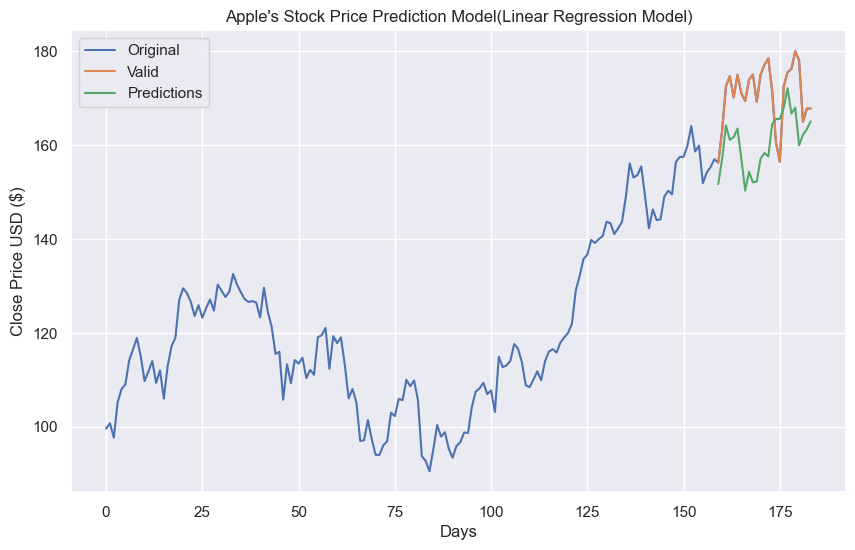

In [23]:
predictions = linearPrediction
valid = apple[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))
plt.title("Apple's Stock Price Prediction Model(Linear Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()